<a href="https://colab.research.google.com/github/shadatsh/Takehome_Assignment_2_3744/blob/main/Takehome_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, util

### Create a synthetic image with two objects

In [2]:
image = np.zeros((100, 100), dtype=np.uint8)
image[20:50, 20:50] = 1  # Object 1
image[60:80, 60:80] = 2  # Object 2
image = image * 127  # Scale up pixel values to increase contrast

### Add Gaussian noise

In [3]:
noisy_image = util.random_noise(image, mode='gaussian', var=0.01) * 255

### Apply Otsu's thresholding

In [4]:
threshold = filters.threshold_otsu(noisy_image)
binary_image = noisy_image > threshold

### Output

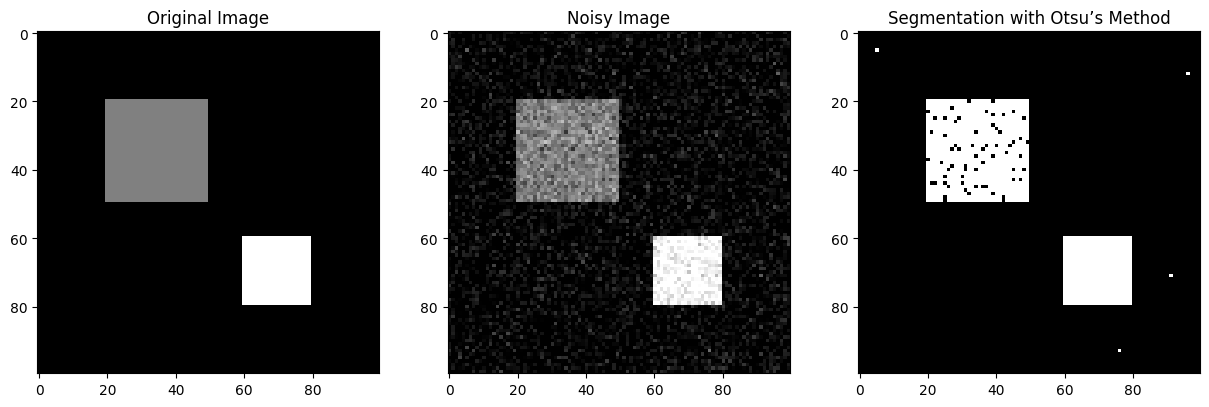

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[2].imshow(binary_image, cmap='gray')
axes[2].set_title('Segmentation with Otsu’s Method')
plt.show()

# PART 2



###   Parameters:
        img       : The input image (2D array).
        seeds     : List of seed points (x, y positions).
        threshold : Threshold for adding pixels to the region (max difference from seed).

  

### Implements the core functionality of the region-growing algorithm for image segmentation

In [10]:
def region_growing(img, seeds, threshold):

    segmented = np.zeros_like(img, dtype=bool)
    to_check = seeds[:]

    # Process all points in the check list
    while to_check:
        x, y = to_check.pop(0)
        # Mark the pixel as segmented
        segmented[x, y] = True
        # Check the neighbors of the pixel
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1]:
                    if not segmented[nx, ny]:
                        # Check if the neighbor pixel should be added to the region
                        if abs(int(img[nx, ny]) - int(img[x, y])) <= threshold:
                            segmented[nx, ny] = True
                            to_check.append((nx, ny))

    return segmented


### Create a simple test image

In [11]:
img = np.zeros((100, 100), dtype=np.uint8)
img[30:70, 30:70] = 100  # A square object
img[40:60, 40:60] = 150  # A smaller square inside

### Define seeds and threshold

In [12]:
seeds = [(50, 50)]  # A seed point inside the smaller square
threshold = 10


### Segment the image

In [13]:
segmented_image = region_growing(img, seeds, threshold)

Output

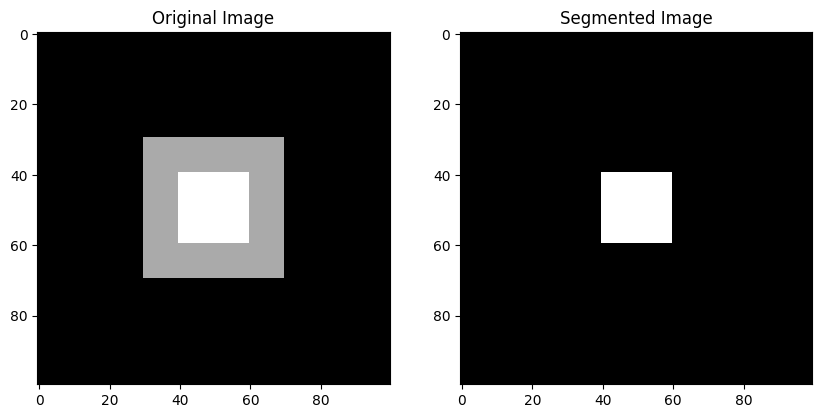

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.show()